# Seaborn Data Visualization with Superstore Dataset

This notebook demonstrates various Seaborn visualization techniques using the Superstore dataset (2015-2018).

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

In [2]:
# Load the Superstore dataset
superstore = pd.read_csv("/home/ryanhabis/Documents/College folder/semester-1/Programming for Data Analytics/dataset/Dataset- Superstore (2015-2018).csv")

# Convert date columns to datetime
superstore['Order Date'] = pd.to_datetime(superstore['Order Date'])
superstore['Ship Date'] = pd.to_datetime(superstore['Ship Date'])

# Display basic info about the dataset
print("Dataset shape:", superstore.shape)
print("\nFirst 5 rows:")
superstore.head()

Dataset shape: (9994, 21)

First 5 rows:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Dataset information
print("Column names:")
print(superstore.columns.tolist())
print("\nDataset info:")
superstore.info()

Column names:
['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object 

## 1. Scatterplot with Regression Line (lmplot)

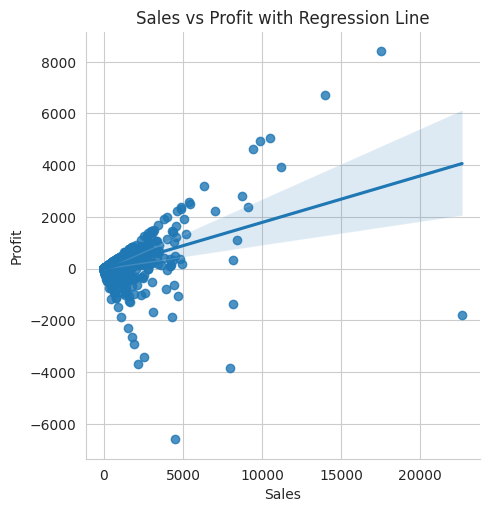

In [4]:
# Basic lmplot - Sales vs Profit
sns.lmplot(x='Sales', y='Profit', data=superstore)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit with Regression Line')
plt.show()

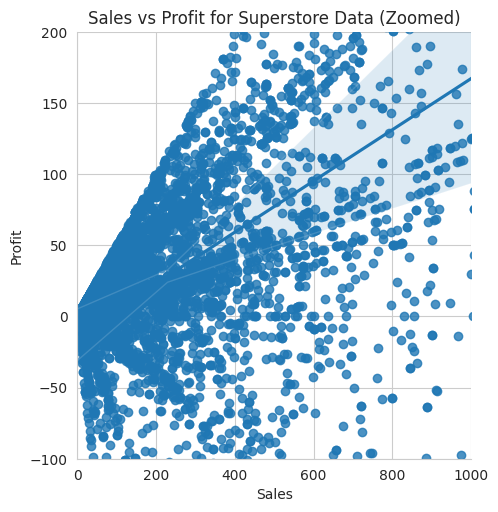

In [5]:
# With custom limits to zoom in
sales_profit = sns.lmplot(x='Sales', y='Profit', data=superstore)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit for Superstore Data (Zoomed)')
sales_profit.set(ylim=(-100, 200), xlim=(0, 1000))
plt.show()

## 2. Grouping with Hue Parameter

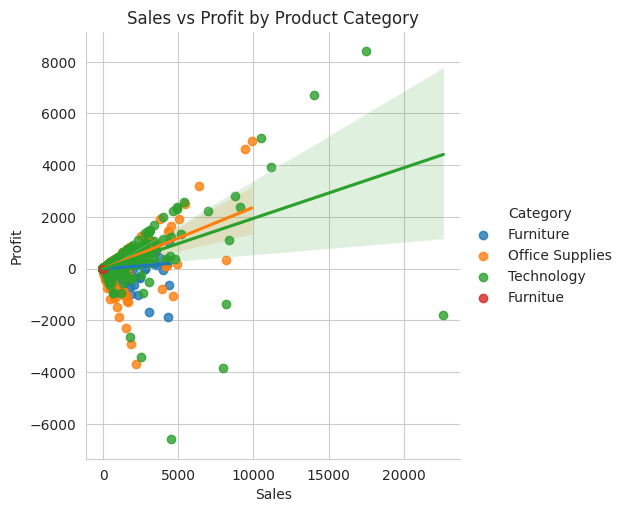

In [6]:
# Color points by Category
sns.lmplot(x='Sales', y='Profit', data=superstore, hue='Category')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit by Product Category')
plt.show()

## 3. Creating Subplots with col Parameter

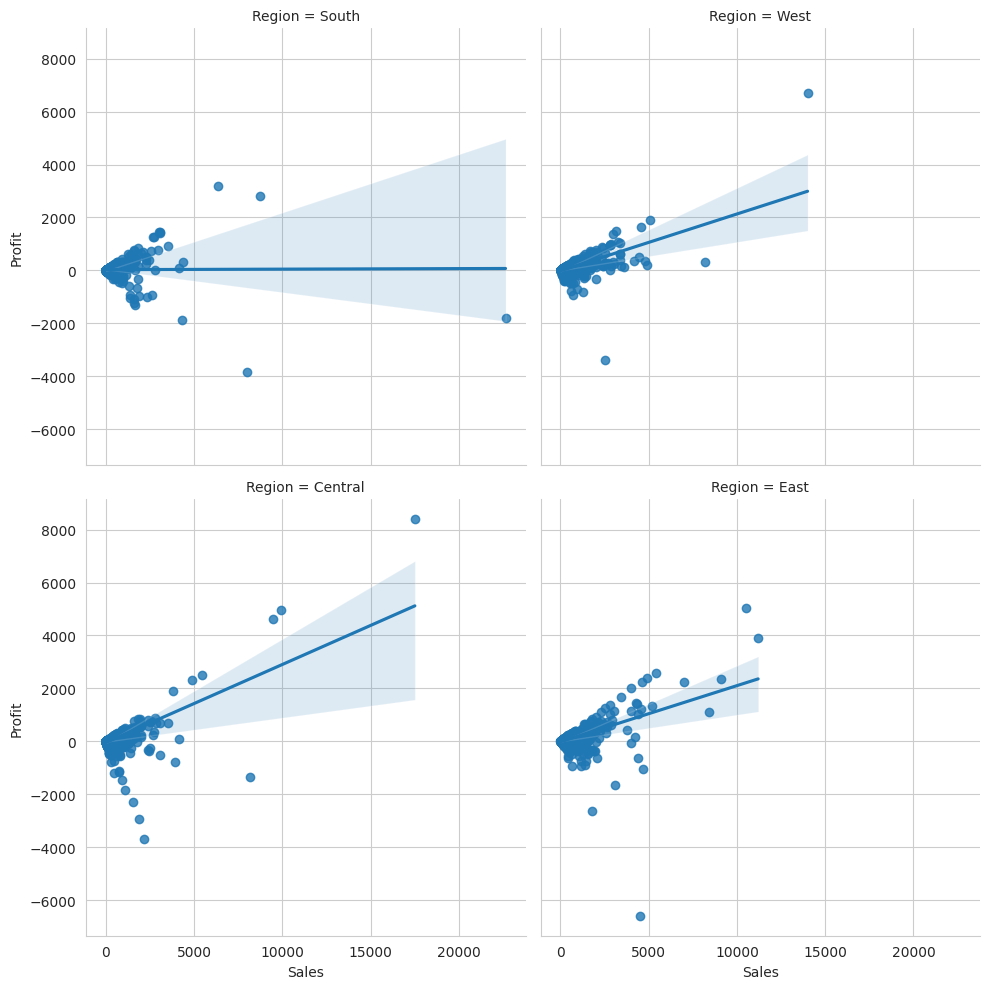

In [7]:
# Subplots by Region
sns.lmplot(x='Sales', y='Profit', data=superstore, col='Region', col_wrap=2)
plt.show()

## 4. Joint Plots

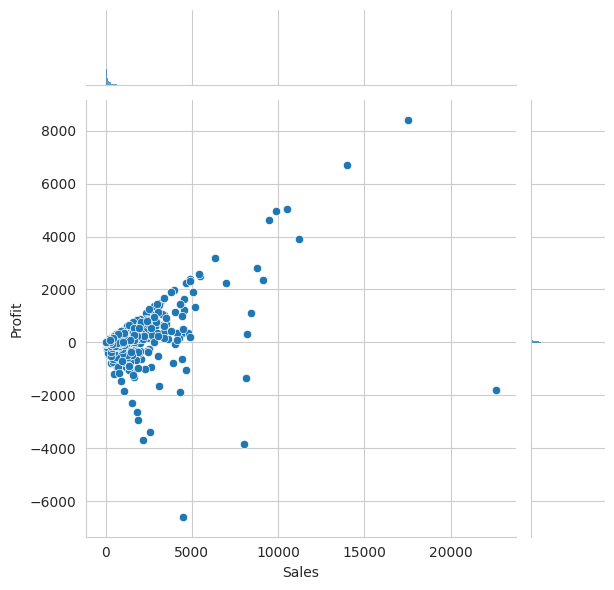

In [8]:
# Joint plot showing scatterplot and histograms
sns.jointplot(x='Sales', y='Profit', data=superstore)
plt.show()

## 5. Pair Plots (Matrix Plots)

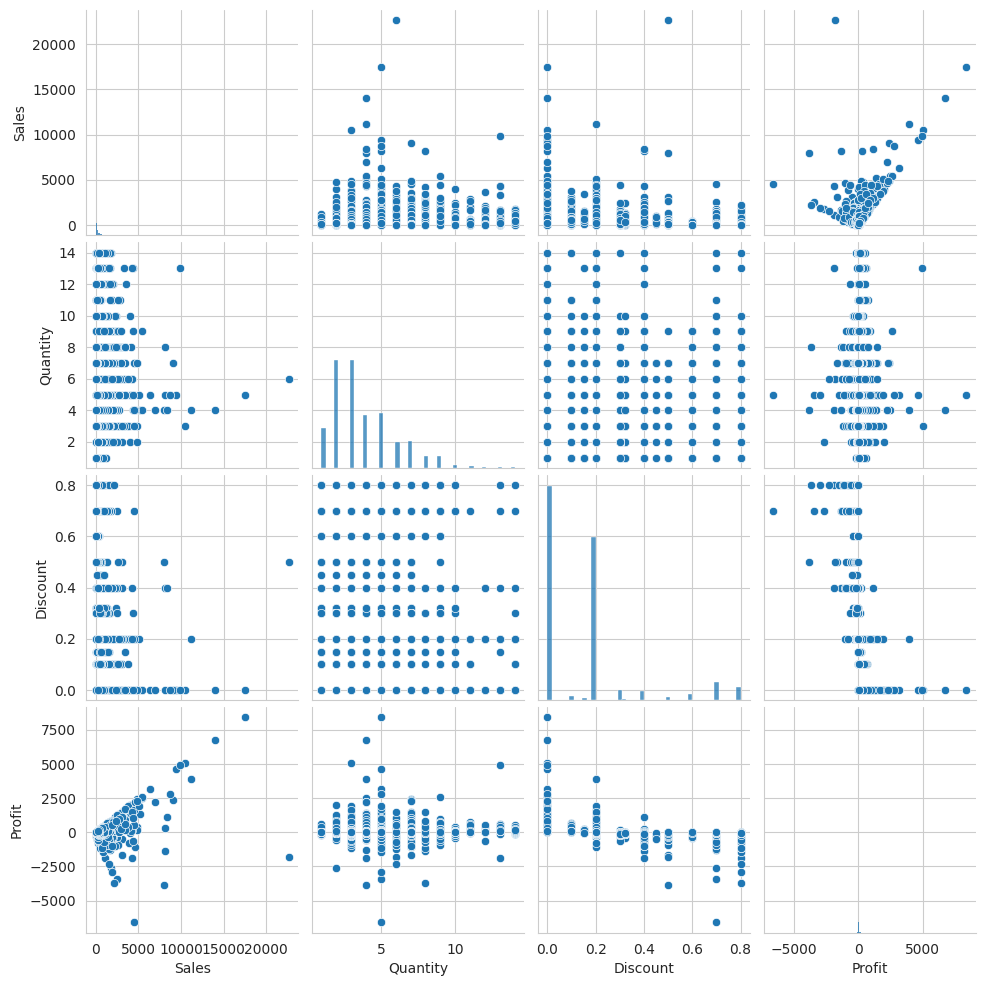

In [9]:
# Pair plot for selected numeric variables
numeric_columns = superstore[['Sales', 'Quantity', 'Discount', 'Profit']]
sns.pairplot(numeric_columns)
plt.show()

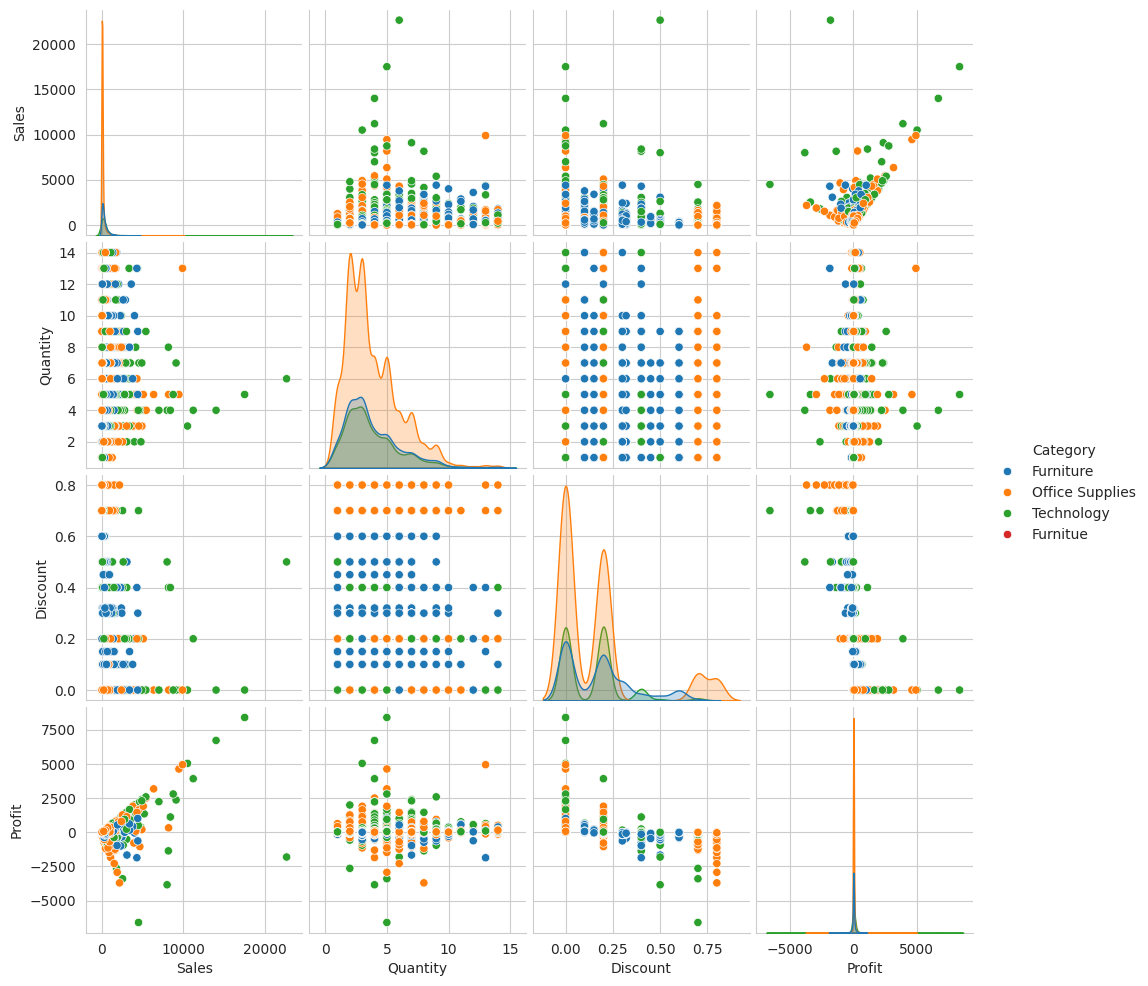

In [ ]:
# Pair plot with hue grouping by Category
sns.pairplot(superstore[['Sales', 'Quantity', 'Discount', 'Profit', 'Category']], hue='Category')
plt.show()

## 6. Residual Plots

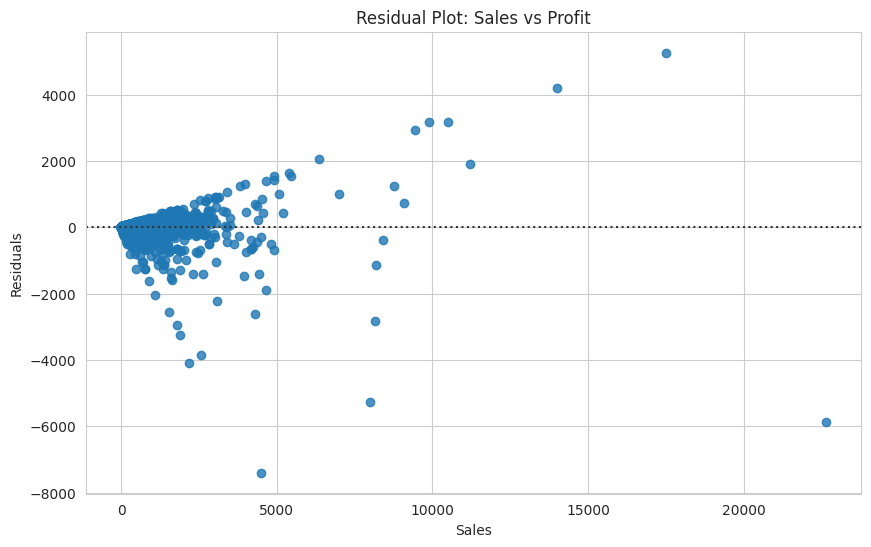

In [11]:
# Residual plot - Sales vs Profit
sns.residplot(x='Sales', y='Profit', data=superstore)
plt.xlabel('Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot: Sales vs Profit')
plt.show()

## 7. Strip Plots

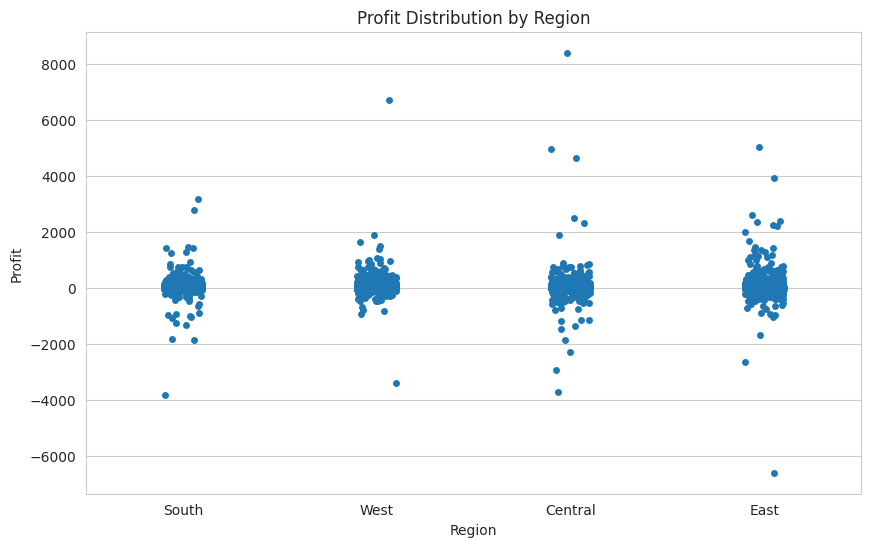

In [12]:
# Strip plot - Profit by Region
sns.stripplot(x='Region', y='Profit', data=superstore)
plt.xlabel('Region')
plt.ylabel('Profit')
plt.title('Profit Distribution by Region')
plt.show()

/tmp/ipykernel_14124/1670217152.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=45)


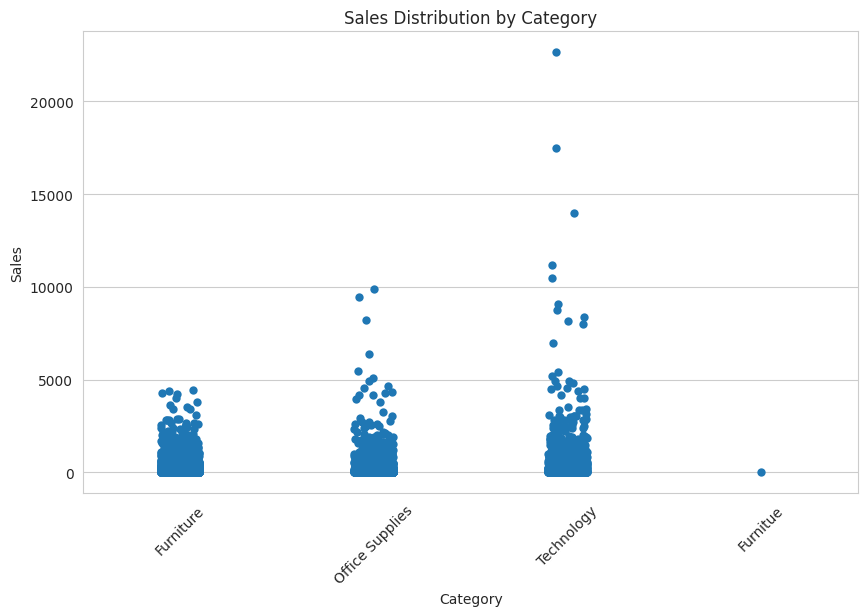

In [ ]:
# Strip plot - Sales by Category with rotated labels
category_plot = sns.stripplot(x='Category', y='Sales', data=superstore, size=6)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales Distribution by Category')
category_plot.set_xticklabels(category_plot.get_xticklabels(), rotation=45)
plt.show()

## 8. Swarm Plots

In [14]:
# Swarm plot - Quantity by Category
sns.swarmplot(x='Category', y='Quantity', data=superstore, size=4)
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.title('Quantity Distribution by Category')
plt.xticks(rotation=45)
plt.show()

/home/ryanhabis/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 84.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ryanhabis/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 93.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ryanhabis/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 82.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ryanhabis/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/ryanhabis/.local/lib/python3.10/site-packages/seaborn/categori

KeyboardInterrupt: 

## 9. Boxplots and Violin Plots

In [ ]:
# Boxplot vs Violin Plot comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y='Profit', data=superstore, ax=ax[0])
sns.violinplot(y='Profit', data=superstore, ax=ax[1])
ax[0].set_title('Boxplot of Profit')
ax[1].set_title('Violin Plot of Profit')
plt.tight_layout()
plt.show()

In [ ]:
# Boxplot for all numeric variables
numeric_data = superstore[['Sales', 'Quantity', 'Discount', 'Profit']]
sns.boxplot(data=numeric_data, palette="Set3")
plt.title('Boxplot of All Numeric Variables')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Boxplot grouped by Category
sns.boxplot(x='Category', y='Profit', data=superstore)
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit Distribution by Category')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Violin plot grouped by Category
sns.violinplot(x='Category', y='Sales', data=superstore)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales Distribution by Category')
plt.xticks(rotation=45)
plt.show()

## 10. Advanced Boxplot Examples

In [ ]:
# Boxplot: Sales by Customer Segment
sns.boxplot(x='Segment', y='Sales', data=superstore)
plt.xlabel('Customer Segment')
plt.ylabel('Sales')
plt.title('Sales Distribution by Customer Segment')
plt.show()

In [ ]:
# Boxplot with hue for Ship Mode
ship_plot = sns.boxplot(x='Region', y='Sales', hue='Ship Mode', data=superstore)
plt.xlabel('Region')
plt.ylabel('Sales')
plt.title('Sales Distribution by Region and Ship Mode')
plt.legend(title='Ship Mode')
plt.show()

In [ ]:
# Boxplot with custom palette
profit_plot = sns.boxplot(x='Category', y='Profit', hue='Segment', data=superstore, palette='Set2')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit Distribution by Category and Segment')
plt.legend(title='Customer Segment')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Boxplot with custom order
region_order = ['West', 'East', 'South', 'Central']
quantity_plot = sns.boxplot(x='Region', y='Quantity', data=superstore, palette='Set1', order=region_order)
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.title('Quantity Distribution by Region')
plt.show()

## 11. Additional Analysis

In [ ]:
# Monthly Sales Trend
monthly_sales = superstore.groupby(superstore['Order Date'].dt.to_period('M'))['Sales'].sum().reset_index()
monthly_sales['Order Date'] = monthly_sales['Order Date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'])
plt.xlabel('Order Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend (2015-2018)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
numeric_corr = superstore[['Sales', 'Quantity', 'Discount', 'Profit']].corr()
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

In [ ]:
# Category-wise Sales and Profit analysis
category_summary = superstore.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'
}).reset_index()

print("Category-wise Summary:")
print(category_summary)

## Summary

This notebook has demonstrated various Seaborn visualization techniques using the Superstore dataset, including:

- Regression plots (lmplot)
- Joint plots and pair plots
- Categorical plots (strip plots, swarm plots, boxplots, violin plots)
- Advanced grouping with hue and col parameters
- Time series analysis
- Correlation analysis

All visualizations are now adapted to work with the Superstore dataset columns.